# 자연어와 단어 분산 표현
---
자연어 처리가 다루는 분야는 다양하지만, 그 본질적 문제는 컴퓨터가 우리의 말을 이해하게 만드는 것이다.  
이번 Chapter는 컴퓨터에 말을 이해시킨다는 것이 무슨 뜻인지, 그리고 어떤 방법들이 존재하는지를 중심적으로 진행한다.  


---
## 자연어 처리란?
- 자연어(natural language) : 한국어, 영어 등 우리가 평소에 사용하는 말
- NLP(Natural Language Processing) : 자연어를 처리하는 분야 ( 자연어를 컴퓨터에게 이해시키기 위한 기술(분야) )

---
### 시소러스(Thesaurus)
- 시소러스란?
    - 유의어 사전으로, '뜻이 같은 단어(동의어)'나 '뜻이 비슷한 단어(유의어)'가 한 그룹으로 분류되어 있다.
    - ex. car = 'auto', 'automobile', 'machine', 'motorcar'
- 시소러스에서는 단어 사이의 '상위와 하위' 혹은 '전체와 부분' 등, 더 세세한 관계까지 정의해둔 경우가 있다.
    - ex. object - motor vehicle - car - SUV, compact, hatch-back...

#### WordNet
- 자연어 처리 분야에서 가장 유명한 시소러스
- 프린스턴 대학교에서 1985년부터 구축하기 시작한 전통 있는 시소러스
- WordNet을 사용하면 유의어를 얻거나 단어 네트워크를 이용할 수 있다.
    - 이를 이용하여 단어 사이의 유사도도 구할 수있다.
    
#### 시소러스의 문제점
- 시대 변화에 대응하기 어렵다.
    - 우리가 사용하는 말은 계속해서 새로운 단어가 생기고 옛말은 언젠가 잊혀진다.
    - 단어의 변화에 대응하려면 시소러스를 사람이 수작업으로 끊임 없이 갱신해야 한다.
- 사람을 쓰는 비용은 크다.
    - 시소러스를 만드는 데는 엄청난 인적 비용이 발생한다.
    - 현존하는 영어의 수는 1,000만개가 넘는데 이 방대한 단어를 모두에 대해 단어 사이의 관계를 정의해야 한다.
    - WordNet에 등록된 단어는 20만 개 이상이다.
- 단어의 미묘한 차이를 표현할 수 없다.
    - 시소러스는 뜻이 비슷한 단어를 묶으나 실제로 비슷한 단어들이라도 미묘한 차이가 있다.
    - 시소러스에는 미묘한 차이를 표현할 수 없다. 만약 수작업으로 표현하려 한다면 곤란한 일이 될 것이다.
    

---
### 통계 기반 기법
- 말뭉치(Corpus)란, 간단히 말하면 대량의 텍스트 데이터이다.
    - 맹목적으로 수집된 데이터가 아닌 자연어 처리 연구나 애필리케이션을 염두에 두고 수집된 텍스트 데이터를 일반적으로 말뭉치라고 한다.
- 자연어 처리에 사용되는 말뭉치에는 텍스트 데이터에 대한 추가 정보가 포함되는 경우가 있다.
    - 예를 들면 텍스트 데이터의 단어 각각에 품사 레이블링
      
#### Python으로 말뭉치 전처리 하기
- 자연어 처리에는 다양한 말뭉치가 사용된다.
    - 유명한 것 : 위키백과, 구글 뉴스, 셰익스피어나 나쓰메 소세키 같은 대문호의 작품


In [1]:
# 간단한 말뭉치를 이용한 corpus 전처리 예시
text = 'You say goodbye and I  say hello.'
print(f'Origin >> {text}')
#소문자로 변환
text = text.lower()
# 마침표의 경우를 고려
text = text.replace('.', ' .')
print(f'Preprocessed >> {text}')
words = text.split()
print(f'Word >> {words}')

Origin >> You say goodbye and I  say hello.
Preprocessed >> you say goodbye and i  say hello .
Word >> ['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']


In [2]:
# 원래의 문장에서 단어에 ID를 부여하고, ID의 리스트로 이용할 수 있도록 손질
# 단어 ID에서 단어로의 변환은 id_to_word
# 단어에서 단어 ID로의 변환은 word_to_id
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [3]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [4]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [5]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [6]:
# Preprocess함수로 전처리 진행
def preprocess(text):
    text = text.lower().replace('.',' .')
    words = text.split()
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    corpus = np.array([word_to_id[w] for w in words])
    
    return corpus, word_to_id, id_to_word

In [7]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [8]:
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [9]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [10]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

#### 단어의 분산 표현(distributional representation)
- 단어의 의미를 정확하게 파악할 수 있게 단어를 벡터로 표현하는 것

#### 분포 가설(distributional hypothesis)
- 단어의 의미는 주변 단어에 의해 형성된다.
- 단어 자체에는 의미가 없고, 그 단어가 사용된 맥락(문맥, context)이 형성한다.
- 맥락의 크기(주변 단어를 몇 개나 포함할지)를 윈도우 크기라고 한다.

#### 동시발생 행렬
- 어떤 단어가 있을 때, 그 주변에 어떤 단어가 몇 번이나 등장하는지를 세어 집계하는 방식을 통계적 기반 기법이라고 한다.

In [11]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i
            
            if left_idx >= 0 :
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
    return co_matrix

In [12]:
create_co_matrix(corpus, len(word_to_id))

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

#### 벡터 간 유사도
- 단어 벡터의 유사도를 나타낼 때는 코사인 유사도(cosine similarity)를 사용한다.
- $$similarity(x, y) = \frac{x \cdot y } {||x||||y||} = \frac {x_{1}y_{1} + \cdots x_{n}y_{n}} {\sqrt {x_{1}^{2} + \cdots x_{n}^{2}}\sqrt {y_{1}^{2} + \cdots y_{n}^{2}}}$$
    - 코사인 유사도를 직관적으로 풀어보면 '두 벡터가 가리키는 방향이 얼마나 비슷한가'이다.
    - 두 벡터의 방향이 완전히 같다면 코사인 유사도가 1이 되며, 완전히 반대라면 -1이 된다.

In [13]:
# 코사인 유사도
# eps는 divide by zero를 위한 오차
def cos_similarity(x, y, eps=1e-10):
    nx = x / np.sqrt(np.sum(x**2) + eps)
    ny = y / np.sqrt(np.sum(y**2) + eps)
    return np.dot(nx,ny)

In [14]:
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
cos_similarity(C[word_to_id['you']], C[word_to_id['i']])

0.7071067811335144

#### 유사 단어의 랭킹 표시


In [15]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    if query not in word_to_id:
        print(f'{query}을(를) 찾을 수 없습니다.')
        return
    
    print('\n[query] ' + query )
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(f' {id_to_word[i]} : {similarity[i]}')
        count += 1
        if count >= top:
            return

In [16]:
most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye : 0.7071067811335144
 i : 0.7071067811335144
 hello : 0.7071067811335144
 say : 0.0
 and : 0.0


---
### 통계 기반 기법 개선하기

#### 상호정보량
- 점별 상호정보량(Pointwise Mutual information, PMI)

In [18]:
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)
            
            if verbose:
                cnt += 1
                if cnt % (total/100) == 0:
                    print('%.1f%% 완료'% (100*cnt/total))
    return M

In [23]:
text =  'You say goodbye and I say Hello. '
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


### 차원 감소(dimensionally reduction)
- 차원 감소는 중요한 정보는 최대한 유지하면서 차원을 줄이는 것이 핵심이다.
- 이 부분에서는 특잇값 분해(SVD)를 통한 차원 감소를 진행하겠다.


In [24]:
U, S, V = np.linalg.svd(W)

In [25]:
print(C[0])

[0 1 0 0 0 0 0]


In [26]:
print(W[0])

[0.    1.807 0.    0.    0.    0.    0.   ]


In [27]:
print(U[0])

[ 3.409e-01  0.000e+00 -1.205e-01 -3.886e-16 -9.323e-01 -1.110e-16
 -2.426e-17]


In [29]:
print(U[0,:2])

[0.341 0.   ]


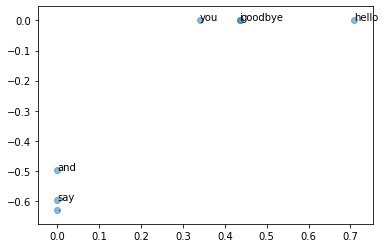

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id,0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=.5)
plt.show()

### PTB 데이터셋
- 펜 트리뱅크(Penn Treebank(PTB))를 이용하고자 한다.

In [32]:
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
print(len(corpus))

Done
929589


In [33]:
print(corpus[:30])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [34]:
id_to_word

{0: 'aer',
 1: 'banknote',
 2: 'berlitz',
 3: 'calloway',
 4: 'centrust',
 5: 'cluett',
 6: 'fromstein',
 7: 'gitano',
 8: 'guterman',
 9: 'hydro-quebec',
 10: 'ipo',
 11: 'kia',
 12: 'memotec',
 13: 'mlx',
 14: 'nahb',
 15: 'punts',
 16: 'rake',
 17: 'regatta',
 18: 'rubens',
 19: 'sim',
 20: 'snack-food',
 21: 'ssangyong',
 22: 'swapo',
 23: 'wachter',
 24: '<eos>',
 25: 'pierre',
 26: '<unk>',
 27: 'N',
 28: 'years',
 29: 'old',
 30: 'will',
 31: 'join',
 32: 'the',
 33: 'board',
 34: 'as',
 35: 'a',
 36: 'nonexecutive',
 37: 'director',
 38: 'nov.',
 39: 'mr.',
 40: 'is',
 41: 'chairman',
 42: 'of',
 43: 'n.v.',
 44: 'dutch',
 45: 'publishing',
 46: 'group',
 47: 'rudolph',
 48: 'and',
 49: 'former',
 50: 'consolidated',
 51: 'gold',
 52: 'fields',
 53: 'plc',
 54: 'was',
 55: 'named',
 56: 'this',
 57: 'british',
 58: 'industrial',
 59: 'conglomerate',
 60: 'form',
 61: 'asbestos',
 62: 'once',
 63: 'used',
 64: 'to',
 65: 'make',
 66: 'kent',
 67: 'cigarette',
 68: 'filters',
 69

In [35]:
word_to_id


{'aer': 0,
 'banknote': 1,
 'berlitz': 2,
 'calloway': 3,
 'centrust': 4,
 'cluett': 5,
 'fromstein': 6,
 'gitano': 7,
 'guterman': 8,
 'hydro-quebec': 9,
 'ipo': 10,
 'kia': 11,
 'memotec': 12,
 'mlx': 13,
 'nahb': 14,
 'punts': 15,
 'rake': 16,
 'regatta': 17,
 'rubens': 18,
 'sim': 19,
 'snack-food': 20,
 'ssangyong': 21,
 'swapo': 22,
 'wachter': 23,
 '<eos>': 24,
 'pierre': 25,
 '<unk>': 26,
 'N': 27,
 'years': 28,
 'old': 29,
 'will': 30,
 'join': 31,
 'the': 32,
 'board': 33,
 'as': 34,
 'a': 35,
 'nonexecutive': 36,
 'director': 37,
 'nov.': 38,
 'mr.': 39,
 'is': 40,
 'chairman': 41,
 'of': 42,
 'n.v.': 43,
 'dutch': 44,
 'publishing': 45,
 'group': 46,
 'rudolph': 47,
 'and': 48,
 'former': 49,
 'consolidated': 50,
 'gold': 51,
 'fields': 52,
 'plc': 53,
 'was': 54,
 'named': 55,
 'this': 56,
 'british': 57,
 'industrial': 58,
 'conglomerate': 59,
 'form': 60,
 'asbestos': 61,
 'once': 62,
 'used': 63,
 'to': 64,
 'make': 65,
 'kent': 66,
 'cigarette': 67,
 'filters': 68,
 'h

In [36]:
window_size=2
wordvec_size=100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size, window_size)
W=ppmi(C, verbose=True)

try:
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                            random_state=42)
except ImportError:
    U, S, V = np.linalg.svd(W)
    
word_vecs = U[:, : wordvec_size]

querys = ['you', 'year', 'car', 'toyota']

for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top = 5)
    
    

1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료

[query] you
 i : 0.6776955723762512
 we : 0.6599389314651489
 bother : 0.5226147174835205
 do : 0.522307097